# Analyzing Borrowers’ Risk of Defaulting

This project is to prepare a report for a bank’s loan division. The bank already has some data on customers’ credit worthiness.

This report will be considered when building the **credit score** of a potential customer. The **credit score** is used to evaluate the ability of a potential borrower to repay their loan.

We will be testing four hypotheses:
    


1.   It is more likely that customers who have children will default on a loan.

2.   Marital status will not have an impact on the ability of a potential borrower to repay their loan.

3. The higher the income, the more likely it is that the customer will repay the loan on time.

4. Different loan purposes will not have an affect on on-time loan repayment.







## Open the data file and having a look at the general information

In [140]:
# Loading all libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [141]:
# Loading the data
try:
  df = pd.read_csv('credit_scoring_eng.csv')
except:
  df = pd.read_csv('/datasets/credit_scoring_eng.csv')

## Data Exploration 

Description of the data:

* `children` - the number of children in the family
* `days_employed` - work experience in days
* `dob_years` - client's age in years
* `education` - client's education
* `education_id` - education identifier
* `family_status` - marital status
* `family_status_id` - marital status identifier
* `gender` - gender of the client
* `income_type` - type of employment
* `debt` - was there any debt on loan repayment
* `total_income` - monthly income
* `purpose` - the purpose of obtaining a loan







In [142]:
# Obtaining the first 10 rows from df
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


In [143]:
# Seeing how many rows and columns our dataset has
df.shape

(21525, 12)

The dataset has 21,525 rows and 12 columns

In [144]:
# Obtaining general information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Our dataset has 21,525 rows, but the 'days_employed' and 'total_income' columns have less than 21,525 values. This means the data contains missing values.

In [145]:
# Percentage of missing values per column
df_mis = df.isnull().sum().to_frame('missing_values')
df_mis['%'] = round(100 * df.isnull().sum() / len(df), 3)
print(df_mis.sort_values(by='%', ascending=False))

                  missing_values     %
days_employed               2174  10.1
total_income                2174  10.1
children                       0   0.0
dob_years                      0   0.0
education                      0   0.0
education_id                   0   0.0
family_status                  0   0.0
family_status_id               0   0.0
gender                         0   0.0
income_type                    0   0.0
debt                           0   0.0
purpose                        0   0.0


The days_employed and total_income columns both have 2,174 missing values. The percent of missing values per column is roughly 10.1%.

In [146]:
# Getting the statiscal summary of the dataset
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


### Conclusions

We can see that there are 21,525 rows and 12 columns. Column names follow the rules of good style, so no change will be needed there. Since there are two columns with exactly the same number of missing values, we can say that these values are not missing at random. 

Next we will deal go through each column and see what issues we may have in them.

## Data Transformation

In [147]:
# Checking for unique values in the education column
print(df['education'].unique())

["bachelor's degree" 'secondary education' 'Secondary Education'
 'SECONDARY EDUCATION' "BACHELOR'S DEGREE" 'some college'
 'primary education' "Bachelor's Degree" 'SOME COLLEGE' 'Some College'
 'PRIMARY EDUCATION' 'Primary Education' 'Graduate Degree'
 'GRADUATE DEGREE' 'graduate degree']


In [148]:
# Fixing uppercase and lowercase problems in the education column
df['education'] = df['education'].str.lower()

In [149]:
# Checking to see if all values in the education column has been fixed
df['education'].value_counts()

secondary education    15233
bachelor's degree       5260
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64

In [150]:
# Checking for unique values in the children column
print(df['children'].unique())

[ 1  0  3  2 -1  4 20  5]


There is a negative value and an extremely high outlier in the 'children' column. This could be do to a human error when inputing the data. Most likely the person entering the data meant to put 1 for -1 and 2 for 20. We will replace these values accordingly.

In [151]:
# Replacing values for the children column
df['children'].replace(-1, 1, inplace=True)
df['children'].replace(20, 2, inplace=True)

In [152]:
# Checking to see if all values in the children column has been fixed
df['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

In [153]:
# Checking for unique values in the days_employed column
print(df['days_employed'].unique())

[-8437.67302776 -4024.80375385 -5623.42261023 ... -2113.3468877
 -3112.4817052  -1984.50758853]


There are negative values in the 'days_employed' column. This could be due to some technical issues. We cannot drop these rows, so instead we will turn the negative values into positive values.

In [154]:
# Taking the absolute value of the days_employed column
df['days_employed'] = df['days_employed'].abs()

In [155]:
# Checking to see if all values in the days_employed column has been fixed
print(df['days_employed'].unique())

[8437.67302776 4024.80375385 5623.42261023 ... 2113.3468877  3112.4817052
 1984.50758853]


In [156]:
# Checking for unique values in the dob_years column
print(df['dob_years'].unique())

[42 36 33 32 53 27 43 50 35 41 40 65 54 56 26 48 24 21 57 67 28 63 62 47
 34 68 25 31 30 20 49 37 45 61 64 44 52 46 23 38 39 51  0 59 29 60 55 58
 71 22 73 66 69 19 72 70 74 75]


It is impossible for the dob_years column to have a value of 0. We will check for the mean and median of this column and replace it accordingly.

In [157]:
# Getting the satistical summary for the dob_years column
df['dob_years'].describe()

count    21525.000000
mean        43.293380
std         12.574584
min          0.000000
25%         33.000000
50%         42.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

Since the mean and median are pretty close in value, there are no significant outliers in this column. We will replace the 0's in the dob_years column with the mean.

In [158]:
# Replacing the 0 in dob_years with the mean
avg_dob_years = df['dob_years'].mean()
df.loc[df['dob_years'] == 0, 'dob_years'] = round(avg_dob_years)


In [159]:
# Checking to see if all values in the dob_years column has been fixed
print(df['dob_years'].unique())

[42 36 33 32 53 27 43 50 35 41 40 65 54 56 26 48 24 21 57 67 28 63 62 47
 34 68 25 31 30 20 49 37 45 61 64 44 52 46 23 38 39 51 59 29 60 55 58 71
 22 73 66 69 19 72 70 74 75]


In [160]:
# Checking for unique values in the family_status column
print(df['family_status'].unique())

['married' 'civil partnership' 'widow / widower' 'divorced' 'unmarried']


In [161]:
# Replacing widow / widower with widowed in the family_status column
df.loc[df['family_status'] == 'widow / widower', 'family_status'] = 'widowed'

In [162]:
# Checking to see if all values in the family_satus column has been fixed
print(df['family_status'].unique())

['married' 'civil partnership' 'widowed' 'divorced' 'unmarried']


In [163]:
# Checking for unique values in the gender column
print(df['gender'].unique())

['F' 'M' 'XNA']


Since the XNA value is unclear. We shall see how many XNA value there are in the dataset before deciding what to do with it.

In [164]:
# Finding the number of XNA values in the gender column
df['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

Since there is only one XNA value in the dataset, we shall leave it alone. 

In [165]:
# Checking for unique values in the income_type column
print(df['income_type'].unique())

['employee' 'retiree' 'business' 'civil servant' 'unemployed'
 'entrepreneur' 'student' 'paternity / maternity leave']


In [166]:
# Replacing the paternity/maternity leave value with parental leave in the income_type column
df.loc[df['income_type'] == 'paternity / maternity leave', 'income_type'] = 'parental leave'

In [167]:
# Checking to see if all values in the income_type column has been fixed
print(df['income_type'].unique())

['employee' 'retiree' 'business' 'civil servant' 'unemployed'
 'entrepreneur' 'student' 'parental leave']


In [168]:
# Checking for unique values in the purpose column
print(df['purpose'].unique())

['purchase of the house' 'car purchase' 'supplementary education'
 'to have a wedding' 'housing transactions' 'education' 'having a wedding'
 'purchase of the house for my family' 'buy real estate'
 'buy commercial real estate' 'buy residential real estate'
 'construction of own property' 'property' 'building a property'
 'buying a second-hand car' 'buying my own car'
 'transactions with commercial real estate' 'building a real estate'
 'housing' 'transactions with my real estate' 'cars' 'to become educated'
 'second-hand car purchase' 'getting an education' 'car'
 'wedding ceremony' 'to get a supplementary education'
 'purchase of my own house' 'real estate transactions'
 'getting higher education' 'to own a car' 'purchase of a car'
 'profile education' 'university education'
 'buying property for renting out' 'to buy a car' 'housing renovation'
 'going to university']


Since many of these purposes are the same, but worded differently, we will simplify the purpose column.

In [169]:
# Grouping phrases in common into 4 different groups in the purpose column 
real_estate = ['house', 'real estate', 'property', 'housing']
car = ['car', 'cars']
education = ['education', 'educated', 'university']
wedding = ['wedding']

# Changing the values with 4 groups of purposes: real estate, car, wedding, education
df.loc[df['purpose'].str.contains('|'.join(real_estate)),'purpose'] = 'real estate'
df.loc[df['purpose'].str.contains('|'.join(car)),'purpose'] = 'car'
df.loc[df['purpose'].str.contains('|'.join(wedding)),'purpose'] = 'wedding'
df.loc[df['purpose'].str.contains('|'.join(education)),'purpose'] = 'education'


In [170]:
# Checking to see if all values in the purpose column has been fixed
print(df['purpose'].unique())

['real estate' 'car' 'education' 'wedding']


### Conclusions
We went through each column and checked for unique values. Here is what we've changed:
* We changed uppercase problems to lowercase in the `education` column
* We replaced the -1 and 20 value in the `children` column with 1 and 2 
* We changed all negative values in the `days_employed` column to positive values
* We replaced the 0 in the `dob_years` column with the mean value 
* We simplified the 'widow/widower' value in the `family_status` column to 'widowed'
* We simplified the purposes in the `pupose` column into 4 different categories: real estate, car, education, wedding

Next we will deal with the duplicated and missing values in our dataset.

## Data Preprocessing

In [171]:
# Checking for duplicates 
df.duplicated().sum()

408

In [172]:
# Removing the duplicates
df = df.drop_duplicates()

In [173]:
# Checking to see if there are any duplicates left
df.duplicated().sum()

0

###  Missing Values

In [174]:
# Calculating number of missing values per column
df.isna().sum()

children               0
days_employed       1766
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        1766
purpose                0
dtype: int64

We still have missing values in the `days_employed` and the `total_income` column. We now have to decide whether to replace the missing values in each column with the mean or median. 

In [175]:
# Checking the statistical summary of the days_employed column
df['days_employed'].describe()

count     19351.000000
mean      66914.728907
std      139030.880527
min          24.141633
25%         927.009265
50%        2194.220567
75%        5537.882441
max      401755.400475
Name: days_employed, dtype: float64

We can see that there is a huge difference between the mean and median in the `days_employed` column. This means that there are signifincat outliers in this column. The high standard deviation indicates that the values are spread out over a very large range. 
We will explore this problem further by plotting a histogram of this column. 

In [176]:
df['days_employed'].value_counts()

142.276217       1
1849.622944      1
886.253127       1
2539.534295      1
390574.985524    1
                ..
1394.302246      1
2325.720832      1
4086.407828      1
1259.497032      1
1636.419775      1
Name: days_employed, Length: 19351, dtype: int64

Text(0, 0.5, 'number of people')

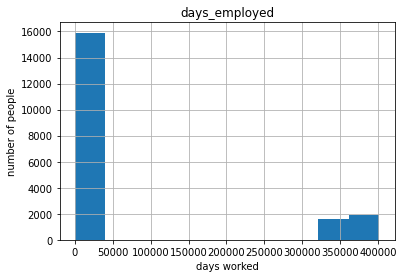

In [177]:
# Plotting a histogram of the days_employed column 
df.hist('days_employed', bins=10)
plt.xlabel('days worked')
plt.ylabel('number of people')

We can see here that there are significant outliers in this `days_employed` column. We have data where some people in this column have worked between 330,000 days (~904 years) and 400,000 days (1095 years). This is impossible and the mistake could have been made due to technical errors. 

To deal with these values, we will replace all values of days_employed greater than 300,000 with null value, NaN.

In [178]:
# Replacing values greater than 300,000 in the days_employed column with NaN
df.loc[(df['days_employed'] >= 300000), 'days_employed'] = float('nan')

In [179]:
# Checking statistical summary of the days_employed column after replacing values greater than 300,000 with NaN
df['days_employed'].describe()

count    15906.000000
mean      2353.015932
std       2304.243851
min         24.141633
25%        756.371964
50%       1630.019381
75%       3157.480084
max      18388.949901
Name: days_employed, dtype: float64

The distribution of the `days_employed` column looks a lot better now that the significant outliers have been removed. We will now proceed to replace missing values with the mean of the days_employed column. 

In [180]:
# Replacing missing values in the days_employed column with the mean
days_employed_avg = df['days_employed'].mean()
df['days_employed'].fillna(value=days_employed_avg, inplace=True)

In [181]:
# Checking to see if all missing values in the days_employed column have been replaced
df['days_employed'].isna().sum()

0

In [182]:
# Checking the statistical summary of the total_income column
df['total_income'].describe()

count     19351.000000
mean      26787.568355
std       16475.450632
min        3306.762000
25%       16488.504500
50%       23202.870000
75%       32549.611000
max      362496.645000
Name: total_income, dtype: float64

Since the mean and median are close in value to each other, we can say that there are no significant outliers in the `total_income` column. We will then proceed by replacing missing values in this column with the mean.

In [183]:
# Replacing missing values in the total_income column with the mean
total_income_avg = df['total_income'].mean()
df['total_income'].fillna(value=total_income_avg, inplace=True)

In [184]:
# Checking to see if all missing values in the total_income column has been replaced
df['total_income'].isna().sum()

0

To make the `days_employed` and `total_income` columns easier to work with, we will convert them to integers. 

In [185]:
# Converting days_employed and total_income columns to integer type
df['days_employed'] = df['days_employed'].astype('int')
df['total_income'] = df['total_income'].astype('int')

In [186]:
# Checking size of data after manipulations
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21117 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21117 non-null  int64 
 1   days_employed     21117 non-null  int64 
 2   dob_years         21117 non-null  int64 
 3   education         21117 non-null  object
 4   education_id      21117 non-null  int64 
 5   family_status     21117 non-null  object
 6   family_status_id  21117 non-null  int64 
 7   gender            21117 non-null  object
 8   income_type       21117 non-null  object
 9   debt              21117 non-null  int64 
 10  total_income      21117 non-null  int64 
 11  purpose           21117 non-null  object
dtypes: int64(7), object(5)
memory usage: 2.1+ MB


### Conclusions
All duplicates have been dropped to make results more precise and easier to understand. 

We detected significant outliers in the `days_employed` column. We replaced these significant outliers with null value, NaN and checked the statistical summary. After removal of significant outliers, the mean and median value in the `days_employed` column became closer. We then proceeded to replace all missing values with the mean value of the `days_employed` column. 

Since the mean and median in the `total_income` column were close in value, we concluded that there were no significant outliers in this column. We then replaced all missing values in `total_income` with the mean value. 

To make our dataset easier to work with, we changed the values from our `days_employed` and `total_income` columns from float type to int type. 

After removing duplicates and replacing missing values, we checked the size of our dataset and found that it reduced from 21,525 rows to 21,117 rows. There are 7 columns with int64 type and 5 columns with object type.

To answer the questions and test the hypotheses, we wil first categorize the data.

## Data Categorization

### Categorizing the debt column

In [187]:
# Checking for unique values in the debt column
print(df['debt'].unique())

[0 1]


The `debt` column identifies whether the customer has any debt on loan repayment. Values in this column are marked with categorica values, 0 or 1:
* 0 meaning no debt
* 1 meaning there is debt

In other words, customers with a 0 did not default on their loans, while customers with a 1 defaulted on their loans. 

To make things easier, we will create a new column to categorize each value in the `debt` column with "default" and "no default."

In [188]:
# Creating a new column for loan defaulting from the debt column
df['loan_default'] = df['debt']

# Changing values in the debt column to "default" and "no default"
df.loc[df['loan_default'] == 0, 'loan_default'] = 'no default'
df.loc[df['loan_default'] == 1, 'loan_default'] = 'defaulted'

In [189]:
# Checking the values in the loan_default column
df['loan_default'].value_counts()

no default    19378
defaulted      1739
Name: loan_default, dtype: int64

### Categorizing the children column

In [190]:
# Checking for unique values in the children column
print(df['children'].unique())

[1 0 3 2 4 5]


We will categorize the children column into categories where customers have kids and no kids. 

In [191]:
# Creating a function that defines whether a customer has children using the following rules:
  # - 'no kids' for 'children' = 0
  # - 'has kids' for 'children' > 0

def having_kids(children):
  if children == 0:
    return 'no kids'
  if children > 0:
    return 'has kids'

# Testing to see if function works
print(having_kids(0))
print(having_kids(1))



no kids
has kids


In [192]:
# Creating a seperate column for the having_kids column 
df['having_kids'] = df['children'].apply(having_kids)

# Checking to see if new column was created
print(df['having_kids'].unique())

['has kids' 'no kids']


### Categorizing the family_status column

In [193]:
# Checking for unique values in the family_status column 
print(df['family_status'].unique())

['married' 'civil partnership' 'widowed' 'divorced' 'unmarried']


Since data is clear, we will leave this column as is. 

### Categorizing the total_income column

In [194]:
# Checking for values in the total_income column
df['total_income'].value_counts()

26787    1766
19552       7
23344       6
15316       5
24821       5
         ... 
18333       1
12192       1
38823       1
28584       1
32728       1
Name: total_income, Length: 15389, dtype: int64

Since there are many different values in the `total_income` column, we will use the describe() method to get a statistical summary of this column.

In [195]:
# Getting the statistical summary of the total_income column 
df['total_income'].describe()

count     21117.000000
mean      26787.065303
std       15771.463931
min        3306.000000
25%       17089.000000
50%       24675.000000
75%       31514.000000
max      362496.000000
Name: total_income, dtype: float64

Since the min(3,306) and max(362,496) total income vary so largely, we will categroize the total income into 5 different categories:
* low income
* lower middle income
* middle income
* upper middle income
* high income  

In [196]:
# We will create a function that returns income type according to total income using the following rules:
  # 'low income' for total income <= 19400
  # 'lower middle income' for total income between 19401 and 78950
  # 'middle income' for total income between 78951 and 168400
  # 'upper middle income' for total income between 168401 and 330000
  # 'high income' for total income > 300000

def income_type (total_income):
  if total_income <= 19400:
    return 'low income'
  if (total_income > 19400) & (total_income <= 78950):
    return 'lower middle income'
  if (total_income > 78951) & (total_income <= 168400):
    return 'middle income'
  if (total_income > 168401) & (total_income <= 330000):
    return 'upper middle income'
  if total_income > 330000:
    return 'high income'

# Testing to see if function works
print(income_type(3825))
print(income_type(20000))
print(income_type(160000))
print(income_type(300000))
print(income_type(400000))

low income
lower middle income
middle income
upper middle income
high income


In [197]:
# Creating a seperate column for income_type
df['income_type'] = df['total_income'].apply(income_type)

# Checking to see if new column was created
print(df['income_type'].unique())

['lower middle income' 'low income' 'middle income' 'upper middle income'
 'high income']


### Categorization of the purpose column 

In [198]:
# Checking for values in the purpose column 
print(df['purpose'].unique())

['real estate' 'car' 'education' 'wedding']


Since the data is clear, we will leave it as is.

In [199]:
# Printing the first 5 rows of the dataset to make sure all columns have been added
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,loan_default,having_kids
0,1,8437,42,bachelor's degree,0,married,0,F,lower middle income,0,40620,real estate,no default,has kids
1,1,4024,36,secondary education,1,married,0,F,low income,0,17932,car,no default,has kids
2,0,5623,33,secondary education,1,married,0,M,lower middle income,0,23341,real estate,no default,no kids
3,3,4124,32,secondary education,1,married,0,M,lower middle income,0,42820,education,no default,has kids
4,0,2353,53,secondary education,1,civil partnership,1,F,lower middle income,0,25378,wedding,no default,no kids


## Conclusions
To make testing our hypotheses easier, we categorized certain data:
* We categrozied the `debt` column by creating a new column, `loan_default`,  that describes whether each cusomer defaulted on a loan or not
* We categorized the `children` column by creating a new column, `having_kids`, that describes whether each customer has kids or not
* We categorized the `total_income` column by creating a new column, `income_type`, to classify whether each customer has low, lower middle, middle, upper middle, or high income. 

We left the `purpose` and `family_status` columns alone since the data was already concise. 

## Testing Hypotheses 

### **Is there a correlation between having children and paying back on time?**

In [200]:
# Creating a table with 2 columns: having_kids and loan_default
df_kids_default = df[['having_kids', 'loan_default']]

# Creating a pivot table based on having_kids and loan_default
kids_default_table = df_kids_default.pivot_table(index='loan_default', columns='having_kids', aggfunc=len, margins=True).reset_index()

# Viewing pivot table
kids_default_table

having_kids,loan_default,has kids,no kids,All
0,defaulted,678,1061,1739
1,no default,6612,12766,19378
2,All,7290,13827,21117


In [201]:
# Calculating default-rate based on the customers who have children 
default_rate_kids = kids_default_table.loc[0,'has kids']/kids_default_table.loc[0,'All']
print(f'Default rate of customers with children: {default_rate_kids:.0%}')

# Calculating the default-rate based on customers who don't have children
default_rate_no_kids = kids_default_table.loc[0,'no kids']/kids_default_table.loc[0,'All']
print(f'Default rate of customers without children: {default_rate_no_kids:.0%}')


Default rate of customers with children: 39%
Default rate of customers without children: 61%


**Conclusion**

The default rate for customers with children is 39%, while the default rate for customers without children is 61%. We can conclude that having children does not affect on a customer's ability to pay back their loan in time. 

In [202]:
# Creating a table with 2 columns: family_status and loan_default
family_status_default = df[['family_status', 'loan_default']]

# Creating a pivot table for family_status and loan_default
family_status_default_table = family_status_default.pivot_table(index='loan_default', columns='family_status', aggfunc=len, margins=True).reset_index()

# Viewing pivot table
family_status_default_table

family_status,loan_default,civil partnership,divorced,married,unmarried,widowed,All
0,defaulted,388,85,929,274,63,1739
1,no default,3735,1108,11145,2510,880,19378
2,All,4123,1193,12074,2784,943,21117


In [203]:
# Calculating default rate for customers in a civil partnership
default_rate_cp = family_status_default_table.loc[0,'civil partnership']/family_status_default_table.loc[0,'All']
print(f'Default rate of customers in a civil partnership: {default_rate_cp:.0%}')

# Calculating default rate for married customers
default_rate_married = family_status_default_table.loc[0,'married']/family_status_default_table.loc[0,'All']
print(f'Default rate of married customers: {default_rate_married:.0%}')

# Calculating default rate for divorced customers
default_rate_divorce = family_status_default_table.loc[0,'divorced']/family_status_default_table.loc[0,'All']
print(f'Default rate of divorced customers: {default_rate_divorce:.0%}')

# Calculating default rate for unmarried customers
default_rate_unmarried = family_status_default_table.loc[0,'unmarried']/family_status_default_table.loc[0,'All']
print(f'Default rate of unmarried customers: {default_rate_unmarried:.0%}')

# Calculating default rate for widowed customers
default_rate_widowed = family_status_default_table.loc[0,'widowed']/family_status_default_table.loc[0,'All']
print(f'Default rate of widowed customers: {default_rate_widowed:.0%}')

Default rate of customers in a civil partnership: 22%
Default rate of married customers: 53%
Default rate of divorced customers: 5%
Default rate of unmarried customers: 16%
Default rate of widowed customers: 4%


**Conclusions**

The highest default rate was for married customers at 53%. The next highest default rate was for customers in a civil partnership at 22%. The lowest default rate was for widowed customers at 4%. The default rate for divorce customers was 5% and the default rate for unmarried customers was 16%. 

From these rates, we can conclude that those in relationships (civil partnerships or married) have the highest default rate. 



### **Is there a correlation between income level and paying back on time?**

In [204]:
# Creating a table with 2 columns: income_type and loan_default
income_type_default = df[['income_type', 'loan_default']]

# Creating a pivot table for income_type and loan_default
income_type_default_table = income_type_default.pivot_table(index='loan_default', columns='income_type', aggfunc=len, margins=True).reset_index()

In [205]:
# Checking value count of income type
df['income_type'].value_counts()

lower middle income    13919
low income              6966
middle income            211
upper middle income       19
high income                2
Name: income_type, dtype: int64

Here we see that there are 19 customers with upper middle income. Since all 19 customers did not default on there debt, there is a null value, NaN, in the pivot table above. To deal with this we will replace NaN with 0. 

In [206]:
# Replacing NaN with 0 in the upper middle income column of our pivot table
income_type_default_table['upper middle income'].fillna(0, inplace=True)

# Reprinting the pivot table to make sure missing values were replaced
income_type_default_table

income_type,loan_default,high income,low income,lower middle income,middle income,upper middle income,All
0,defaulted,1.0,567.0,1158.0,13.0,0.0,1739
1,no default,1.0,6399.0,12761.0,198.0,19.0,19378
2,All,2.0,6966.0,13919.0,211.0,19.0,21117


In [207]:
# Default rate for high income customers
default_rate_high = income_type_default_table.loc[0,'high income']/income_type_default_table.loc[0,'All']
print(f'Default rate for high income customers: {default_rate_high:.0%}')

# Default rate for upper middle income customers
default_rate_upper_middle = income_type_default_table.loc[0,'upper middle income']/income_type_default_table.loc[0,'All']
print(f'Default rate for upper middle income customers: {default_rate_upper_middle:.0%}')

# Default rate for middle income customers
default_rate_middle = income_type_default_table.loc[0,'middle income']/income_type_default_table.loc[0,'All']
print(f'Default rate for middle income customers: {default_rate_middle:.0%}')

# Default rate for lower middle income customers
default_rate_lower_middle = income_type_default_table.loc[0,'lower middle income']/income_type_default_table.loc[0,'All']
print(f'Default rate for lower middle income customers: {default_rate_lower_middle:.0%}')

# Default rate for low income customers
default_rate_low = income_type_default_table.loc[0,'low income']/income_type_default_table.loc[0,'All']
print(f'Default rate for low income customers: {default_rate_low:.0%}')

Default rate for high income customers: 0%
Default rate for upper middle income customers: 0%
Default rate for middle income customers: 1%
Default rate for lower middle income customers: 67%
Default rate for low income customers: 33%


**Conclusions**

The default rate for customers with high to upper middle income is 0%. The middle income customers have a default rate of 1%. Those in the lower income brackets (lower middle and low income) have the highest default rate. 

We can conclude that customers low incomes tend to default on their loans more than customers in the higher income brackets.  

### **How does credit purpose affect the default rate?**

In [208]:
# Creating a table with 2 columns: purpose and loan default
purpose_default = df[['purpose', 'loan_default']]

# Creating a pivot table with the purpose and loan_default
purpose_default_table = purpose_default.pivot_table(index='loan_default', columns='purpose', aggfunc=len, margins=True).reset_index()

# Checking pivot table
purpose_default_table

purpose,loan_default,car,education,real estate,wedding,All
0,defaulted,402,370,781,186,1739
1,no default,3870,3594,9794,2120,19378
2,All,4272,3964,10575,2306,21117


In [209]:
# Default rate for customers who took out a loan for a car 
default_rate_car = purpose_default_table.loc[0,'car']/purpose_default_table.loc[0,'All']
print(f'Default rate for car loans: {default_rate_car:.0%}')

# Default rate for customers who took out a loan for education purposes
default_rate_education = purpose_default_table.loc[0,'education']/purpose_default_table.loc[0,'All']
print(f'Default rate for education loans:{default_rate_education:.0%}')

# Default rate for customers who took out a loan for real estate purposes
default_rate_real_estate = purpose_default_table.loc[0,'real estate']/purpose_default_table.loc[0,'All']
print(f'Default rate for real estate loans: {default_rate_real_estate:.0%}')

# Default rate for customers who took out a lon for wedding purposes 
default_rate_wedding = purpose_default_table.loc[0,'wedding']/purpose_default_table.loc[0,'All']
print(f'Default rate for wedding purposes: {default_rate_wedding:.0%}')

Default rate for car loans: 23%
Default rate for education loans:21%
Default rate for real estate loans: 45%
Default rate for wedding purposes: 11%


### Conclusions

The default rate for customers who took out a loan for real estate purposes was the highest at 45%. The default rate was the least for customers who took out a loan for wedding purposes at 11%. 

We can conclude that there is a correlation between loan purposes and defaulting on a loan. 

# Findings

We have tested the following four hypotheses:

1. It is more likely that customers who have children will default on a loan.

2. Marital status will not have an impact on the ability of a potential borrower to repay their loan.

3. The higher the income, the more likely it is that the customer will repay the loan on time.

4. Different loan purposes will not have an affect on on-time loan repayment.

After analyzing the data, we concluded:

1. Having children does not affect the customer's ability to pay back their loan on time. 
  * There are more clients without children that have defaulted on their loans
  
The first hypothesis is rejected. Having children does not seem to affect a customer's ability to repay their loan. 

2. Those in relationships (civil partnerships or married) have the highest default rate. 

The second hypothesis is rejected. 

3. Higher income customers had the lowest default rate.
  * Those in high income brackets had the lowest default rate, while those in the lower income brackets has the highest default rate.

The third hypothesis is fully accepted. Customers with a high income are more likely to not default on a loan. 

4. There were different default rates for different loan purposes.
  * The highest default rate was for customers who took out a loan for real estate purposes. This makes sense since buying a house or doing home improvements are costly, so customers might be taking out a bigger loan. 
  * The lowest default rate was for customers who took out a loan for wedding purposes. 

The fourth hypothesis is rejected. Different loan purposes do have an affect on on-time loan repayment. 





